In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('Laptop_price DATA SET.csv')

In [4]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [6]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [7]:
data.duplicated().sum()

0

In [8]:
data['Brand'].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_10920\1524178572.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 2, f"{v:.1f}%", ha='center', fontsize=10)


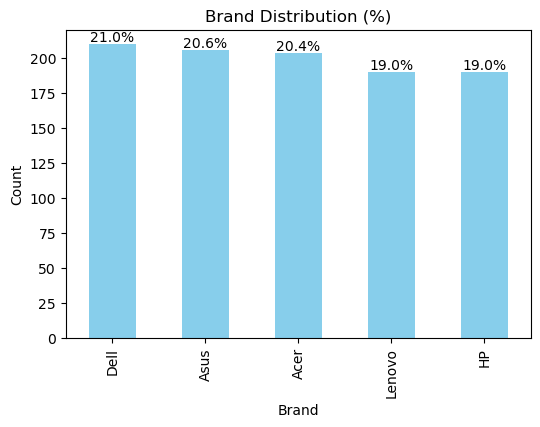

In [9]:
import matplotlib.pyplot as plt

# Value counts
counts = data['Brand'].value_counts()
percentages = counts / counts.sum() * 100

# Bar plot
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color='skyblue')

# Add percentages on top of bars
for i, v in enumerate(percentages):
    plt.text(i, counts[i] + 2, f"{v:.1f}%", ha='center', fontsize=10)

plt.title("Brand Distribution (%)")
plt.ylabel("Count")
plt.xlabel("Brand")
plt.show()


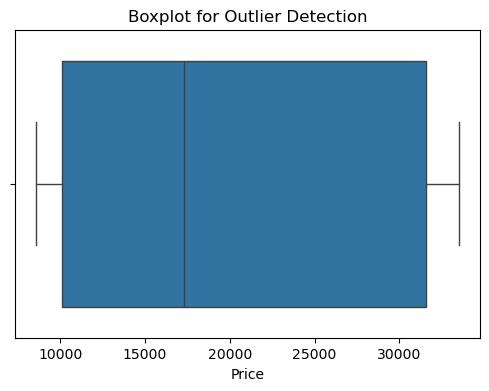

In [10]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.title("Boxplot for Outlier Detection")
plt.show()


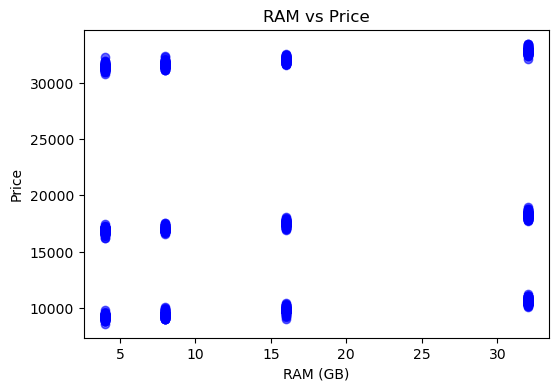

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(data['RAM_Size'], data['Price'], color='blue', alpha=0.6)
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()

In [12]:
ram_price = data.groupby('RAM_Size')['Price'].mean().reset_index()
print(ram_price)

   RAM_Size         Price
0         4  18579.027530
1         8  19973.417704
2        16  19201.274920
3        32  20530.369935


In [13]:
data[(data['RAM_Size']==4) & (data['Price']>31000)]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
10,Asus,3.835918,4,1000,14.295859,3.092338,31967.607632
27,HP,2.495422,4,1000,14.244407,2.269749,31549.799845
44,HP,1.532736,4,1000,12.877179,4.732408,31381.405548
50,Asus,1.713374,4,1000,11.976890,2.513885,31339.159742
...,...,...,...,...,...,...,...
961,HP,2.719635,4,1000,13.643441,2.011511,32307.190755
980,Lenovo,3.220337,4,1000,14.392520,3.292575,31665.884014
982,Asus,2.136677,4,1000,15.783266,4.175333,31341.446313
993,HP,2.796020,4,1000,16.689509,2.060070,31571.913189


In [14]:
data[(data['RAM_Size']==16) & (data['Price']<10000) &(data['Processor_Speed']>3)]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
18,Dell,3.674741,16,256,11.746297,3.539549,9637.891638
24,Dell,3.507134,16,256,14.006527,2.952664,9929.514356
47,Acer,3.902676,16,256,16.891434,3.039676,9701.088818
151,Dell,3.750047,16,256,14.281256,2.497703,9926.274778
152,Dell,3.684725,16,256,15.024053,2.074052,9941.850074
176,Lenovo,3.331430,16,256,13.384689,3.327100,9960.397604
265,Dell,3.960209,16,256,13.485206,3.634317,9978.874050
283,Asus,3.874903,16,256,16.228811,4.791927,9968.179815
361,Asus,3.702177,16,256,11.622071,3.267968,9990.735036
429,Asus,3.096315,16,256,14.780239,4.752629,9674.421041


In [15]:
data.iloc[[27,44,50]]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
27,HP,2.495422,4,1000,14.244407,2.269749,31549.799845
44,HP,1.532736,4,1000,12.877179,4.732408,31381.405548
50,Asus,1.713374,4,1000,11.976890,2.513885,31339.159742


In [16]:
data[data['Price']>30000]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
10,Asus,3.835918,4,1000,14.295859,3.092338,31967.607632
20,HP,2.978189,16,1000,14.695471,2.279588,31965.356610
21,Acer,2.497507,16,1000,16.059669,3.231487,32025.836689
...,...,...,...,...,...,...,...
988,Lenovo,3.148385,16,1000,11.957749,3.017661,32045.641451
989,HP,3.737794,32,1000,13.013740,3.633786,33309.869501
992,Asus,1.666630,32,1000,15.980906,3.337867,32684.106787
993,HP,2.796020,4,1000,16.689509,2.060070,31571.913189


In [17]:
data[(data['Price']>20000) & (data['Price']<31000) ].sort_values(by='Price')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
365,Acer,1.822175,4,1000,14.288194,2.447422,30846.987761
161,Dell,1.617415,4,1000,11.094879,4.974361,30967.939942
465,HP,3.493898,4,1000,11.795867,4.889477,30976.616363
471,Acer,2.699847,4,1000,13.343562,2.623350,30998.008610


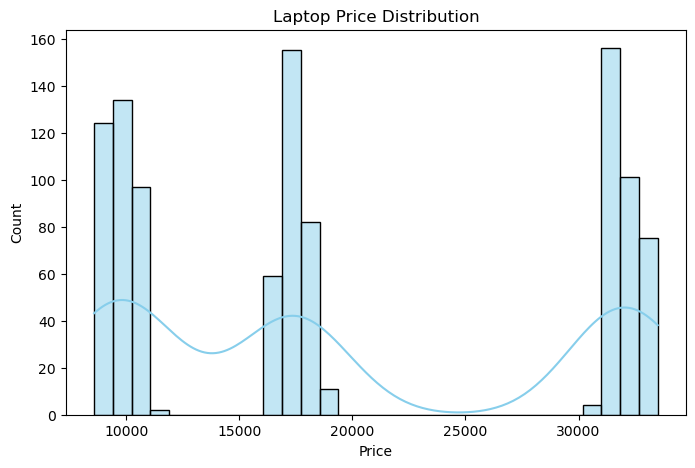

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data['Price'], bins=30, kde=True, color='skyblue')  # kde=True adds smooth curve
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()



In [19]:
data['Price'].max()

33503.93503731473

In [20]:
data[data['Price']>30000].sort_values(by='Price')


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
365,Acer,1.822175,4,1000,14.288194,2.447422,30846.987761
161,Dell,1.617415,4,1000,11.094879,4.974361,30967.939942
465,HP,3.493898,4,1000,11.795867,4.889477,30976.616363
471,Acer,2.699847,4,1000,13.343562,2.623350,30998.008610
841,Acer,1.881040,4,1000,15.488965,2.850824,31081.277607
...,...,...,...,...,...,...,...
574,Acer,3.928488,32,1000,14.783486,3.154198,33354.902596
338,Acer,3.208147,32,1000,16.890244,3.675057,33370.442080
302,Dell,3.448961,32,1000,15.637920,3.356260,33459.847493
610,Dell,3.610426,32,1000,14.985210,2.073854,33489.969689


Plotting clusters using scatter plot

In [21]:
import seaborn as sns
features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']


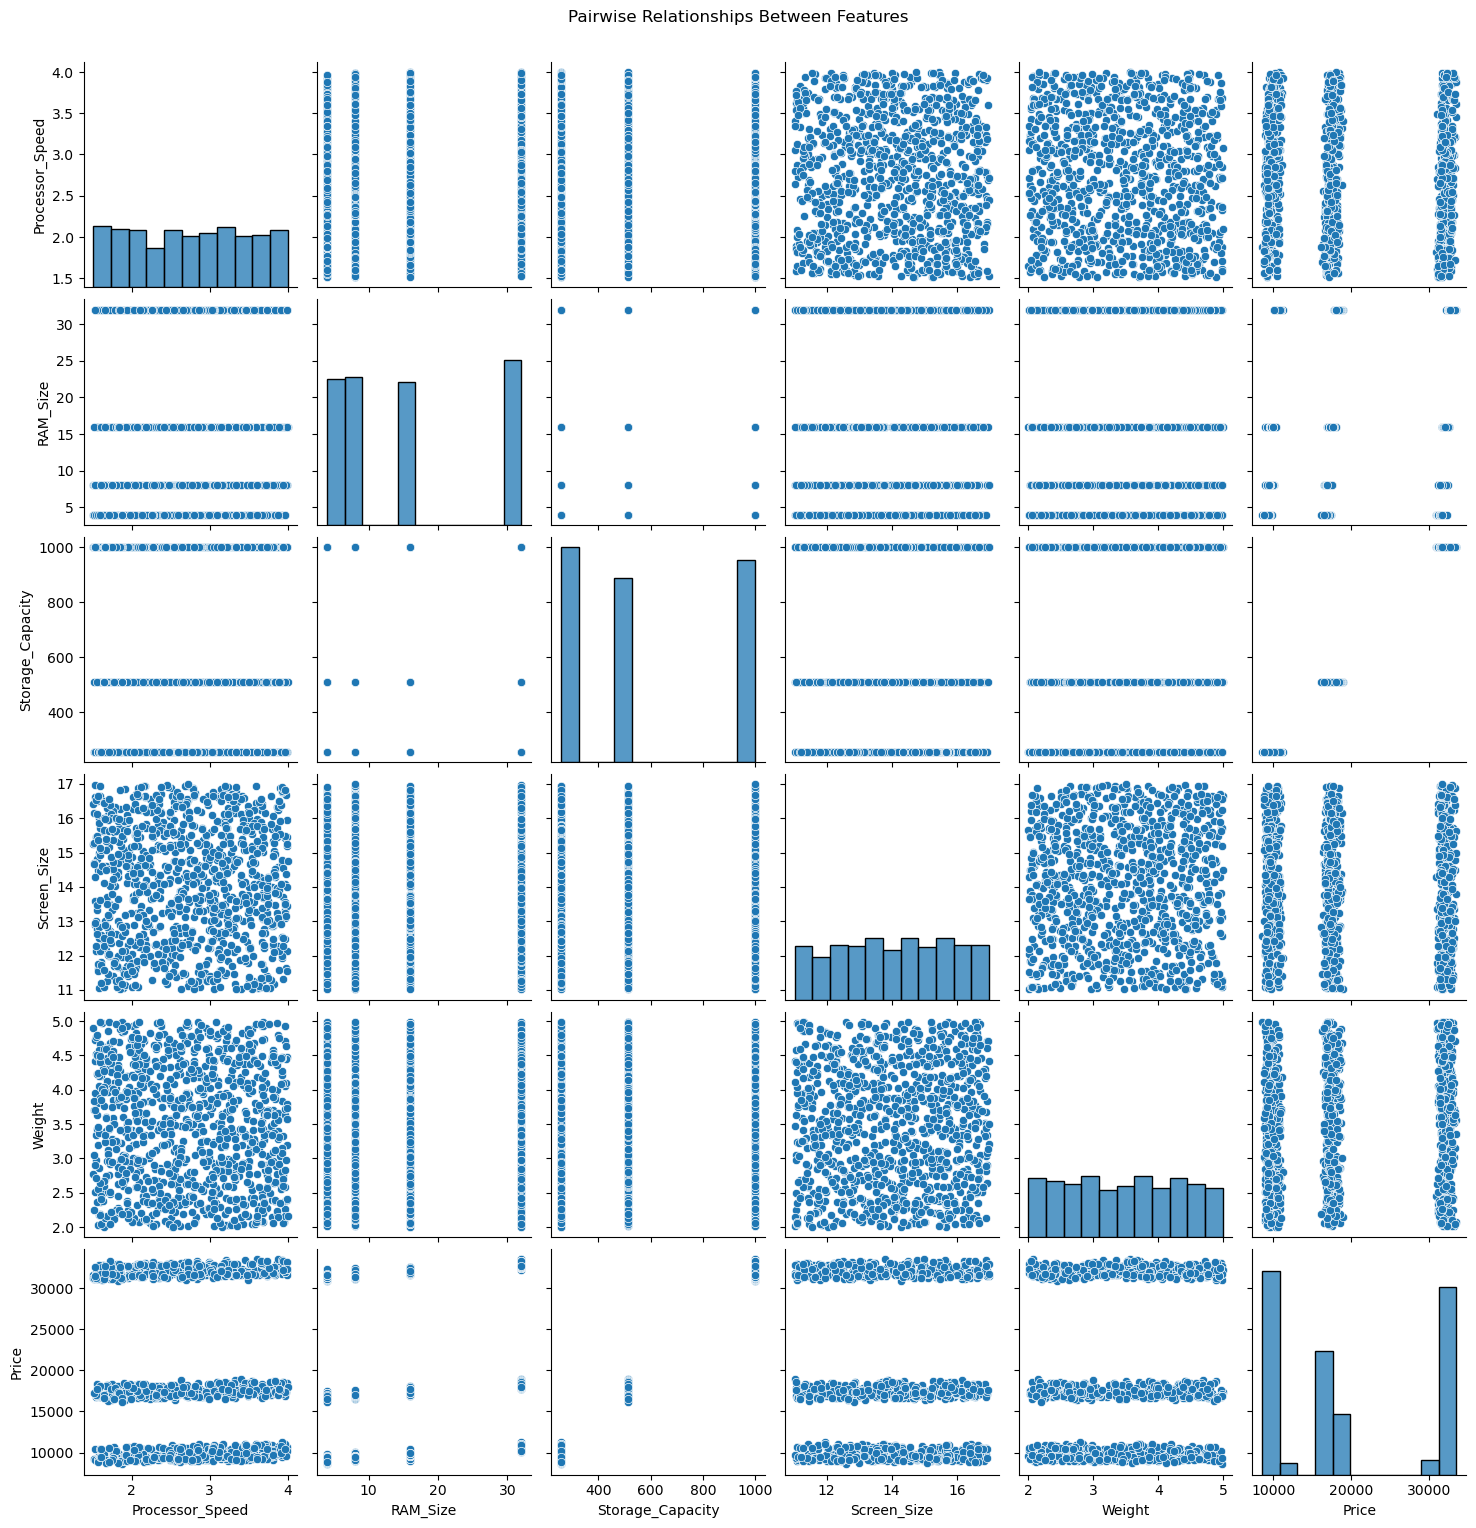

In [22]:
sns.pairplot(data[features])
plt.suptitle('Pairwise Relationships Between Features', y=1.02)
plt.show()

In [23]:
data.groupby(['Brand', 'RAM_Size'])['Price'].median()


Brand   RAM_Size
Acer    4           17003.944499
        8           17163.762533
        16          17352.269346
        32          18194.156697
Asus    4           16631.419566
        8           17141.523092
        16          17493.650157
        32          18414.099675
Dell    4           16628.355456
        8           16959.087932
        16          17514.666889
        32          18076.176555
HP      4           16908.293956
        8            9650.342718
        16          17595.709114
        32          18141.776279
Lenovo  4           16715.111346
        8           17055.855773
        16          17296.044259
        32          18404.162432
Name: Price, dtype: float64

Group based Median technique to reset prices 

In [24]:
# Choose grouping columns (important specs that drive price)
grouping_columns = [
    'Brand',
    'RAM_Size',
    'Storage_Capacity',
]

In [25]:
group_medians = data.groupby(grouping_columns)['Price'].median().reset_index()

In [26]:
group_medians

,Brand,RAM_Size,Storage_Capacity,Price
0,Acer,4,256,9229.661145
1,Acer,4,512,17003.944499
2,Acer,4,1000,31321.056763
3,Acer,8,256,9506.548361
4,Acer,8,512,17033.801117
5,Acer,8,1000,31753.560919
6,Acer,16,256,9788.380429
7,Acer,16,512,17430.878055
8,Acer,16,1000,31985.347815
9,Acer,32,256,10603.045889


In [27]:
group_medians.rename(columns={'Price': 'Group_Median_Price'}, inplace=True)

In [28]:
group_medians

,Brand,RAM_Size,Storage_Capacity,Group_Median_Price
0,Acer,4,256,9229.661145
1,Acer,4,512,17003.944499
2,Acer,4,1000,31321.056763
3,Acer,8,256,9506.548361
4,Acer,8,512,17033.801117
5,Acer,8,1000,31753.560919
6,Acer,16,256,9788.380429
7,Acer,16,512,17430.878055
8,Acer,16,1000,31985.347815
9,Acer,32,256,10603.045889


In [29]:
# Merge with original data
data_with_medians = data.merge(group_medians, on=grouping_columns, how='left')

In [30]:
data_with_medians

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Group_Median_Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,17540.244336
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,31321.056763
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,9087.071603
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,17430.878055
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,32826.279117
...,...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,31550.904300
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,9341.695392
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,16924.307466
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,9460.145105


In [31]:
# Merge Group_Median_Price in data 
data['Price_Corrected'] = data_with_medians['Group_Median_Price']

In [32]:
data.tail(20)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected
980,Lenovo,3.220337,4,1000,14.392520,3.292575,31665.884014,31494.358623
981,Asus,2.594008,4,256,13.653514,2.936576,9277.584226,9219.619834
982,Asus,2.136677,4,1000,15.783266,4.175333,31341.446313,31653.262947
983,HP,3.602179,4,256,15.345395,4.388902,9261.621122,9261.621122
984,Lenovo,1.596066,4,256,15.142434,4.498812,9495.625372,9087.071603
985,Lenovo,3.754405,16,1000,13.043269,4.957305,32427.605391,32208.418240
986,Acer,2.653694,32,512,15.829782,4.373853,18028.999081,18163.087743
987,Asus,3.093004,8,1000,11.314348,3.804152,31359.913387,31637.770363
988,Lenovo,3.148385,16,1000,11.957749,3.017661,32045.641451,32208.418240
989,HP,3.737794,32,1000,13.013740,3.633786,33309.869501,32754.918471


In [33]:
def realistic_price_adjustment(data):
    """
    Adjust prices to reflect realistic RAM and storage contributions
    """
    # Base prices for minimum configuration
    base_price_4gb_256gb = 9000
    
    # Realistic upgrade costs (based on market research)
    ram_upgrade_cost = {
        4: 0,      # Base
        8: 1500,   # +1,500 PKR for 8GB vs 4GB
        16: 4000,  # +4,000 PKR for 16GB vs 4GB  
        32: 8000   # +8,000 PKR for 32GB vs 4GB
    }
    
    storage_upgrade_cost = {
        256: 0,    # Base
        512: 3000, # +3,000 PKR for 512GB vs 256GB
        1000: 6000 # +6,000 PKR for 1TB vs 256GB
    }
    
    # Brand premiums (Dell/HP more expensive than Acer)
    brand_premium = {
        'Acer': 1.0,
        'Asus': 1.1, 
        'Lenovo': 1.05,
        'HP': 1.15,
        'Dell': 1.2
    }
    
    # Calculate realistic prices
    data['Realistic_Price'] = (
        base_price_4gb_256gb +
        data['RAM_Size'].map(ram_upgrade_cost) +
        data['Storage_Capacity'].map(storage_upgrade_cost)
    ) * data['Brand'].map(brand_premium)
    
    # Add some variation based on other features
    data['Realistic_Price'] = data['Realistic_Price'] * (
        1 + 0.1 * (data['Processor_Speed'] - 2.5) +  # Processor impact
        0.05 * (data['Screen_Size'] - 13) / 13       # Screen size impact
    )
    
    return data

# Apply realistic adjustment
data = realistic_price_adjustment(data)

In [34]:
data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,17540.244336,19818.468884
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,31321.056763,15521.828581
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,9087.071603,10109.149357
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,17430.878055,18045.711992
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,32826.279117,24942.738204


In [35]:
data.groupby(grouping_columns)['Realistic_Price'].median().reset_index()

,Brand,RAM_Size,Storage_Capacity,Realistic_Price
0,Acer,4,256,9498.535479
1,Acer,4,512,13069.023634
2,Acer,4,1000,14620.670654
3,Acer,8,256,11350.563180
4,Acer,8,512,13580.034292
5,Acer,8,1000,17085.000575
6,Acer,16,256,13014.972405
7,Acer,16,512,16641.467169
8,Acer,16,1000,19426.268678
9,Acer,32,256,18690.708587


In [36]:
data['Price'].min()

8570.01295046808

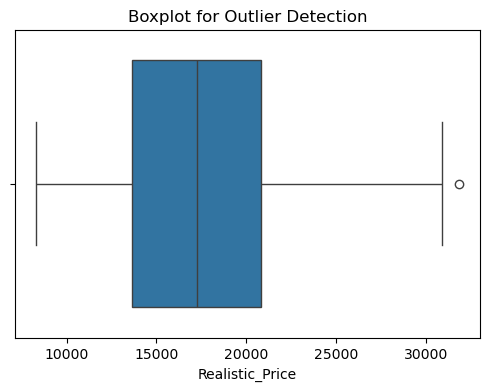

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Realistic_Price'])
plt.title("Boxplot for Outlier Detection")
plt.show()

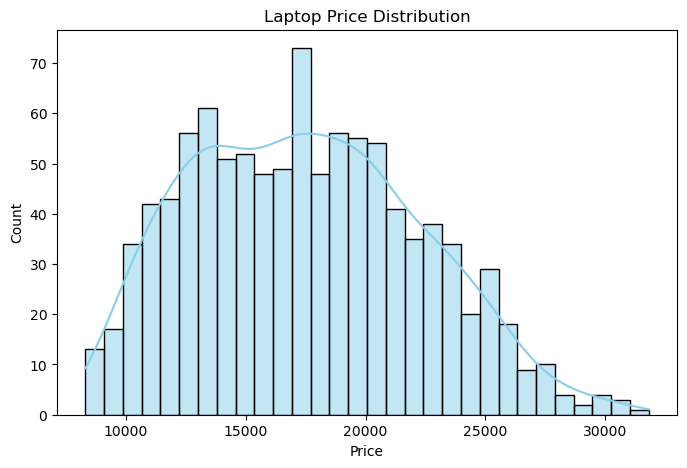

In [38]:
#Visualizing Pricing distribution now 
plt.figure(figsize=(8,5))
sns.histplot(data['Realistic_Price'], bins=30, kde=True, color='skyblue')  # kde=True adds smooth curve
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [39]:
data[(data['Realistic_Price']>20000) & (data['Realistic_Price']<25000) ].sort_values(by='Realistic_Price')

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
881,Acer,2.507450,32,512,13.524567,2.629693,18187.249005,18163.087743,20055.252218
946,HP,3.423262,16,512,12.497018,2.334463,17555.227699,17546.539003,20063.206895
940,HP,2.624462,32,256,16.659049,2.694797,10404.656365,10583.974207,20068.454805
623,Asus,3.834688,16,512,14.948496,3.121841,17539.352433,17540.244336,20080.948235
870,Lenovo,2.021276,32,512,14.394129,3.341603,17879.225670,18385.203770,20107.282930
...,...,...,...,...,...,...,...,...,...
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,32826.279117,24942.738204
640,Asus,2.269825,32,1000,15.449616,2.020444,33188.923153,32818.079928,24956.023333
255,Lenovo,2.822343,32,1000,13.308822,2.144277,32808.856451,32871.265503,24957.142732
795,HP,3.978140,16,1000,11.642343,4.632356,32493.058447,32022.411611,24965.640466


In [40]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963,19604.564292,17479.865723
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880,9398.157767,4763.214895
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950,9087.071603,8291.846073
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948,9929.377410,13613.419084
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878,17321.502772,17235.549642
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754,31620.009327,20821.827187
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037,32871.265503,31833.305166


In [41]:
#Removing outlier on the right side
Q1=data.Realistic_Price.quantile(0.25)
Q3=data.Realistic_Price.quantile(0.75)

In [42]:
Q1,Q3

(13613.419083806082, 20821.827186720584)

In [43]:
#Finding Range IQR
IQR=Q3-Q1

In [44]:
upper_limit=Q3+1.5*IQR

In [45]:
data[data.Realistic_Price>upper_limit]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
842,Dell,3.981209,32,1000,14.367534,2.978846,32878.791391,32868.877401,31833.305166


In [46]:
#romiving this data from the original one 
data=data[data.Realistic_Price<upper_limit]

In [47]:
data[data['Realistic_Price']>30000]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
73,HP,3.865289,32,1000,15.711613,4.969269,33005.181338,32754.918471,30337.042956
302,Dell,3.448961,32,1000,15.637920,3.356260,33459.847493,32868.877401,30499.158256
610,Dell,3.610426,32,1000,14.985210,2.073854,33489.969689,32868.877401,30875.513804
885,HP,3.939026,32,1000,12.498633,4.098790,33254.524201,32754.918471,30205.218000


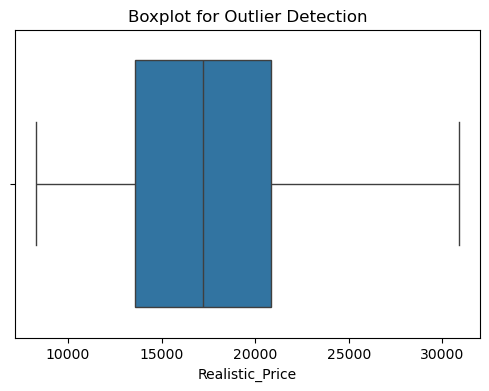

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Realistic_Price'])
plt.title("Boxplot for Outlier Detection")
plt.show()

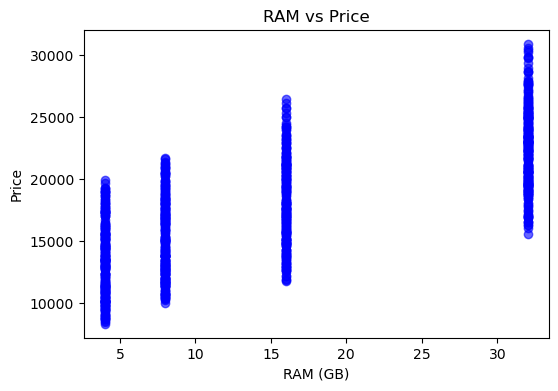

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(data['RAM_Size'], data['Realistic_Price'], color='blue', alpha=0.6)
plt.title("RAM vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()

In [50]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Price_Corrected,Realistic_Price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2.749379,15.483483,584.160160,14.056479,3.467408,19590.900072,19591.286702,17465.497916
std,0.731125,10.981743,313.319403,1.706708,0.866838,9401.380904,9393.476498,4743.870686
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950,9087.071603,8291.846073
25%,2.088366,8.000000,256.000000,12.633346,2.713763,10096.432573,9929.377410,13594.885177
50%,2.756415,16.000000,512.000000,14.098546,3.467107,17283.376008,17321.502772,17231.520086
75%,3.357768,32.000000,1000.000000,15.533989,4.212936,31563.312429,31599.989208,20820.828408
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037,32871.265503,30875.513804


In [51]:
#Now analysing if data follows linear relationship or non linear
new_features = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Realistic_Price']

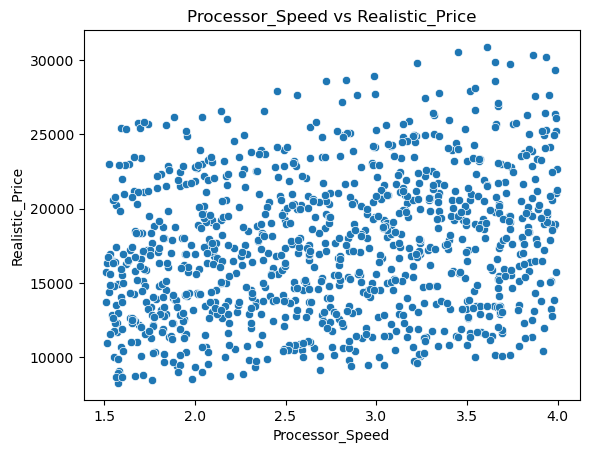

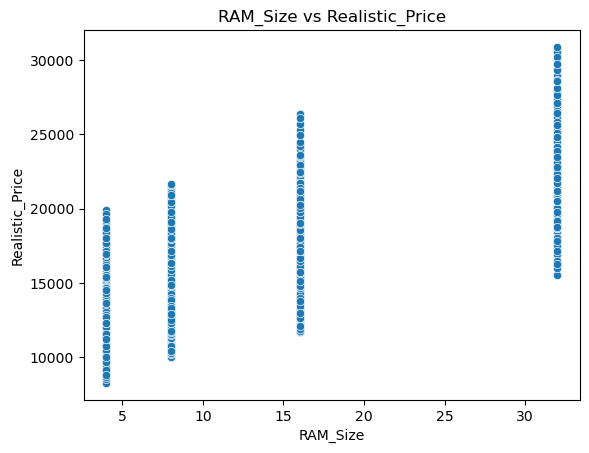

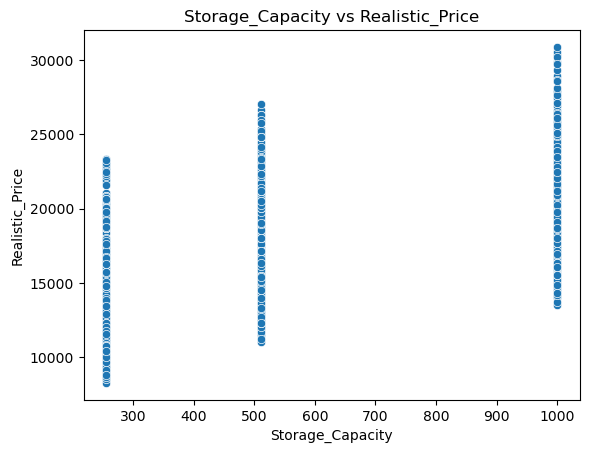

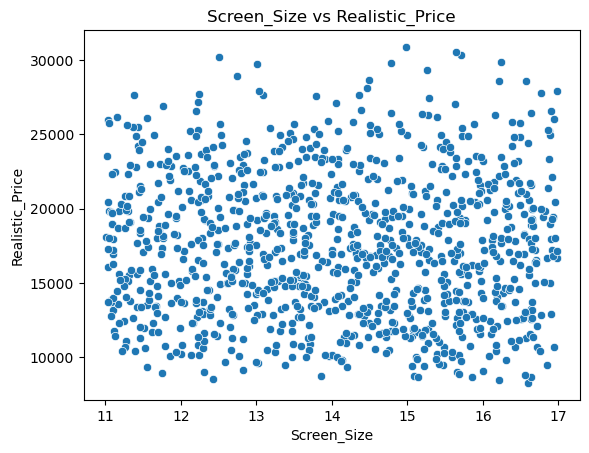

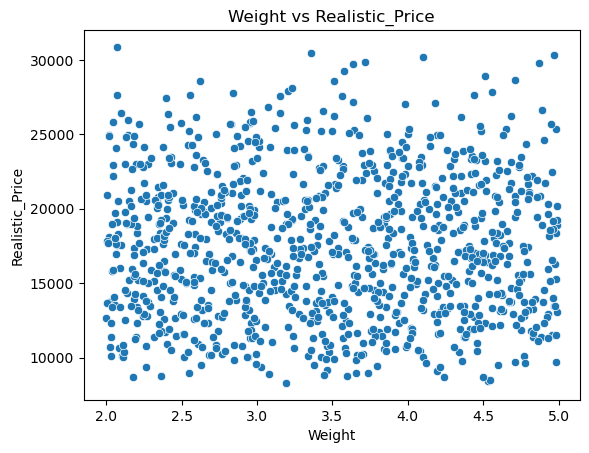

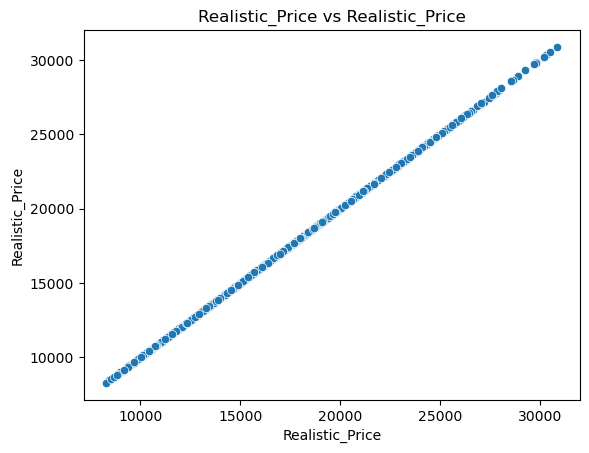

In [52]:
for col in new_features:
    sns.scatterplot(x=data[col], y=data['Realistic_Price'])
    plt.title(f"{col} vs Realistic_Price")
    plt.show()

In [53]:
#Encoding Brand column 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Brand'] = encoder.fit_transform(data['Brand'])   


In [54]:
#Defining our features and target variable
X=data.drop(['Realistic_Price','Price','Price_Corrected'], axis=1)
Y=data['Realistic_Price']
X.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight'],
      dtype='object')

In [55]:
#Data Splitting 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2, random_state=42)


In [56]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import numpy as np

In [57]:
#Making pipeline of models usins dictionary
# Models dictionary
models = {
    # distance/linear-based (need scaling)
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsRegressor(n_neighbors=5))
    ]),
    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel="rbf"))
    ]),
    
    # tree/ensemble-based (no scaling)
    "Linear Regression":LinearRegression(), 
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

In [58]:
for name, model in models.items():
    print(f"\n===== {name} =====")
    
    # Train
    model.fit(X_train, Y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training set performance
    mse_train = mean_squared_error(Y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    
    # Test set performance
    mse_test = mean_squared_error(Y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    
    # Print results
    print(f"Train -> MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}")
    print(f"Test  -> MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}")


===== KNN =====
Train -> MSE: 1133464.62, RMSE: 1064.64
Test  -> MSE: 2103883.94, RMSE: 1450.48

===== SVR =====
Train -> MSE: 22583147.55, RMSE: 4752.17
Test  -> MSE: 20806608.57, RMSE: 4561.43

===== Linear Regression =====
Train -> MSE: 1676513.37, RMSE: 1294.80
Test  -> MSE: 1670949.19, RMSE: 1292.65

===== Random Forest =====
Train -> MSE: 55258.01, RMSE: 235.07
Test  -> MSE: 355032.06, RMSE: 595.85

===== XGBoost =====
Train -> MSE: 300.48, RMSE: 17.33
Test  -> MSE: 108275.09, RMSE: 329.05


In [59]:
#Tuning Model
from sklearn.model_selection import RandomizedSearchCV

In [60]:
#Step1 Chooaing Random Forest as a base model
rf_base=models['Random Forest']


In [61]:
#Step2 Define hyperparameter search space
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

In [62]:
random_search=RandomizedSearchCV(estimator=rf_base,param_distributions=param_grid,cv=5, n_iter=20, random_state=42, n_jobs=-1)

In [63]:
#Step3 fitting and finding best model
random_search.fit(X_train,Y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42)

In [64]:
#Get the best model
best_model=random_search.best_estimator_

#Step4 Evaluating 

 # Predictions
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

# Training set performance
mse_train_tune = mean_squared_error(Y_train, Y_train_pred)
rmse_train_tune = np.sqrt(mse_train_tune)
    
# Test set performance
mse_test_tune = mean_squared_error(Y_test, Y_test_pred)
rmse_test_tune = np.sqrt(mse_test_tune)


print("\n===== Tuned Random Forest =====")
print(f"Train -> MSE: {mse_train_tune:.2f}, RMSE: {rmse_train_tune:.2f}")
print(f"Test  -> MSE: {mse_test_tune:.2f}, RMSE: {rmse_test_tune:.2f}")


===== Tuned Random Forest =====
Train -> MSE: 91739.34, RMSE: 302.89
Test  -> MSE: 373284.02, RMSE: 610.97


In [75]:
import pandas as pd

# Example unseen single row
unseen_data = pd.DataFrame([{
    "Brand": "HP",          # categorical (needs same encoding as training)
    "Processor_Speed": 3.90,
    "RAM_Size": 64,
    "Storage_Capacity": 2000,
    "Screen_Size": 16.0,
    "Weight": 1
}])

print("Unseen data:")
print(unseen_data)

# Encode Brand same way as training
unseen_data["Brand"] = encoder.transform(unseen_data["Brand"])

# Predict with tuned model
unseen_pred = best_model.predict(unseen_data)

print("\nPredicted Realistic Price for unseen laptop:")
print(unseen_pred[0])


Unseen data:
  Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  Weight
0    HP              3.9        64              2000         16.0       1

Predicted Realistic Price for unseen laptop:
29587.898181562025


In [76]:
#Saving the updated dataset as a new csv file 
data.to_csv('processed_data.csv', index=False)

In [77]:
#Save model in pickle file
import joblib
joblib.dump(best_model, "laptop_price_model.pkl")

['laptop_price_model.pkl']